# Satellite Image Classification

## Objective:
- First use Principal Component Analysis (PCA) to reduce the dimensions while preserving most of the information. 
- Build Machine Learning model to classify the satellite images into their respective classes and also compare the performance of different models based on accuracy and f1_score metric.


## Dataset Description:
- Satellite Image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot.
     
      Cloudy Images     - 1500
      Desert Images     - 1131
      Green_Area Images - 1500
      Water Images      - 1500
      
      Total Images      - 5631

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import cv2
from skimage import io,img_as_float,img_as_ubyte,color
import glob
from sklearn.metrics import accuracy_score,f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [2]:
# Using Glob to read multiple files
cloudy_file_list=glob.glob(r"C:\Users\Shree\Desktop\DS Projects\Satelite Image Classification\data\cloudy\*.*")
desert_file_list=glob.glob(r"C:\Users\Shree\Desktop\DS Projects\Satelite Image Classification\data\desert\*.*")
greenary_file_list=glob.glob(r"C:\Users\Shree\Desktop\DS Projects\Satelite Image Classification\data\green_area\*.*")
water_file_list=glob.glob(r"C:\Users\Shree\Desktop\DS Projects\Satelite Image Classification\data\water\*.*")

In [3]:
len(cloudy_file_list),len(desert_file_list),len(greenary_file_list),len(water_file_list)

(1500, 1131, 1500, 1500)

## Read images using skimage

In [4]:
## Now let us load each file at a time.
cloudy_img=[] 
desert_img=[]
greenery_img=[]
water_img=[]

## Iterate through each cloudy img file 
for file in cloudy_file_list:
    img=io.imread(file)
    cloudy_img.append(img)
    
## Iterate through each desert img file 
for file in desert_file_list:
    img=io.imread(file)
    desert_img.append(img)
    
## Iterate through each green img file 
for file in greenary_file_list:
    img=io.imread(file)
    greenery_img.append(img)
    
## Iterate through each water img file 
for file in water_file_list:
    img=io.imread(file)
    water_img.append(img)

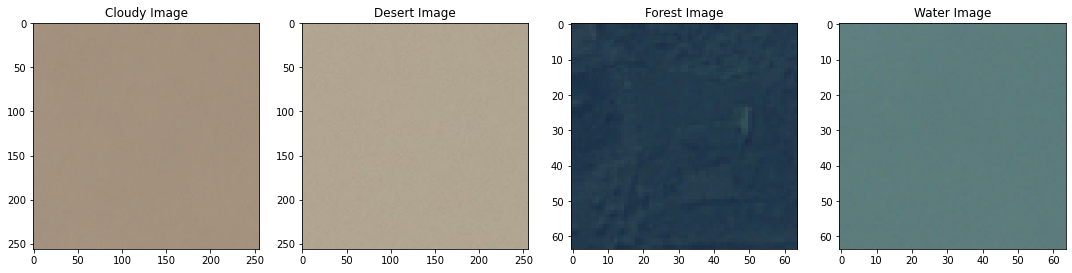

In [5]:
## Viewed images from stored list
plt.figure(figsize=(15,15))

plt.subplot(1,4,1)
plt.imshow(cloudy_img[4])
plt.title("Cloudy Image")

plt.subplot(1,4,2)
plt.imshow(desert_img[4])
plt.title("Desert Image")

plt.subplot(1,4,3)
plt.imshow(greenery_img[4]) 
plt.title("Forest Image")

plt.subplot(1,4,4)
plt.imshow(water_img[4]) 
plt.title("Water Image")

plt.tight_layout()

In [6]:
cloudy_img[4].shape,desert_img[4].shape,greenery_img[4].shape,water_img[4].shape

((256, 256, 3), (256, 256, 3), (64, 64, 3), (64, 64, 3))

In [7]:
len(cloudy_img[0].flatten()),len(water_img[0].flatten())

(196608, 12288)

## Image Processing

In [8]:
from skimage import transform 

Text(0.5, 1.0, 'Resized Image')

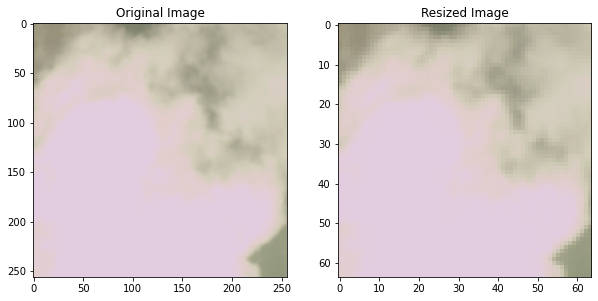

In [9]:
resize_img=transform.resize(cloudy_img[0],output_shape=(64,64,3))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cloudy_img[0])
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(resize_img)
plt.title("Resized Image")

In [10]:
print(f"Original Image Shape:{cloudy_img[0].shape}")
print(f"Resize Image Shape:{resize_img.shape}")

Original Image Shape:(256, 256, 3)
Resize Image Shape:(64, 64, 3)


### Resize all images to same size of (64 * 64 * 3) and convert into 1D vector

In [11]:
# Resize and then flatten images to 1D vector 
cloudy_list=[]
for img in cloudy_img:
    resize_img=transform.resize(img,output_shape=(64,64,3))
    img_flatten=resize_img.flatten()
    cloudy_list.append(img_flatten)

In [12]:
len(cloudy_list)

1500

In [13]:
cloudy_list[0]

array([0.60171029, 0.58332866, 0.48632533, ..., 0.58265605, 0.59607843,
       0.49656268])

In [14]:
# Modified image feature vector
len(cloudy_list[0])

12288

In [15]:
# Create dataframe of image vectors
df_cloudy=pd.DataFrame(cloudy_list)
df_cloudy["Label"]='C'
df_cloudy.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.601710,0.583329,0.486325,0.632631,0.603563,0.512448,0.619468,0.587062,0.497041,0.605956,...,0.573676,0.593044,0.490701,0.573078,0.591682,0.487583,0.582656,0.596078,0.496563,C
1,0.636695,0.674510,0.645319,0.640996,0.674519,0.649145,0.637158,0.670559,0.647355,0.636816,...,0.667145,0.694790,0.677036,0.669053,0.697367,0.670854,0.669442,0.698039,0.670193,C
2,0.627451,0.635294,0.572549,0.627337,0.635557,0.572547,0.626419,0.632946,0.571423,0.626121,...,0.692991,0.693294,0.638633,0.690017,0.695208,0.633937,0.689505,0.695264,0.633355,C
3,0.601146,0.581538,0.544006,0.601315,0.581375,0.541821,0.599832,0.580128,0.541627,0.601121,...,0.624006,0.611807,0.564698,0.621246,0.608130,0.563248,0.621516,0.611862,0.563410,C
4,0.640669,0.564706,0.492867,0.640582,0.565096,0.496134,0.638994,0.568237,0.494130,0.639605,...,0.645650,0.570757,0.499099,0.643448,0.566515,0.502494,0.638612,0.565852,0.494068,C


In [16]:
df_cloudy.shape

(1500, 12289)

In [17]:
desert_list=[]
for img in desert_img:
    resize_img=transform.resize(img,output_shape=(64,64,3))
    img_flatten=resize_img.flatten()
    desert_list.append(img_flatten)
    
df_desert=pd.DataFrame(desert_list)
df_desert["Label"]='D'
df_desert.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.597818,0.440955,0.440955,0.594388,0.437525,0.437525,0.594063,0.437200,0.437200,0.595659,...,0.643461,0.494441,0.482676,0.653482,0.504462,0.492697,0.644096,0.495076,0.483311,D
1,0.667593,0.549946,0.447985,0.647003,0.529356,0.427395,0.628043,0.510396,0.408435,0.620039,...,0.649018,0.531371,0.437254,0.644205,0.526558,0.432441,0.620087,0.502440,0.408323,D
2,0.633098,0.466671,0.423028,0.633295,0.464268,0.430818,0.630378,0.460976,0.434720,0.626384,...,0.627036,0.450565,0.438800,0.629616,0.453146,0.441381,0.620175,0.443704,0.431940,D
3,0.696222,0.645242,0.570732,0.695639,0.644659,0.570149,0.697826,0.646846,0.572336,0.697677,...,0.700265,0.649284,0.574774,0.695250,0.644270,0.569760,0.702483,0.651502,0.576993,D
4,0.701960,0.650980,0.576470,0.701184,0.650203,0.575694,0.696024,0.645043,0.570534,0.700668,...,0.691546,0.648408,0.569977,0.693633,0.650495,0.572064,0.693816,0.650678,0.572247,D


In [18]:
df_desert.shape

(1131, 12289)

In [19]:
forest_list=[]
for img in greenery_img:
    resize_img=transform.resize(img,output_shape=(64,64,3))
    img_flatten=resize_img.flatten()
    forest_list.append(img_flatten)
    
df_forest=pd.DataFrame(forest_list)
df_forest["Label"]='F'
df_forest.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.149020,0.254902,0.298039,0.149020,0.254902,0.298039,0.156863,0.262745,0.305882,0.141176,...,0.141176,0.250980,0.294118,0.141176,0.250980,0.298039,0.145098,0.235294,0.298039,F
1,0.176471,0.282353,0.356863,0.188235,0.278431,0.349020,0.192157,0.274510,0.349020,0.188235,...,0.168627,0.250980,0.333333,0.156863,0.247059,0.317647,0.188235,0.278431,0.349020,F
2,0.156863,0.270588,0.286275,0.145098,0.274510,0.294118,0.152941,0.301961,0.313725,0.168627,...,0.164706,0.286275,0.298039,0.168627,0.290196,0.298039,0.149020,0.282353,0.278431,F
3,0.141176,0.231373,0.262745,0.141176,0.227451,0.278431,0.145098,0.231373,0.286275,0.117647,...,0.109804,0.203922,0.243137,0.113725,0.207843,0.254902,0.117647,0.211765,0.258824,F
4,0.149020,0.219608,0.298039,0.149020,0.219608,0.298039,0.164706,0.235294,0.313725,0.168627,...,0.137255,0.223529,0.305882,0.137255,0.223529,0.313725,0.137255,0.223529,0.317647,F


In [20]:
df_forest.shape

(1500, 12289)

In [21]:
water_list=[]
for img in water_img:
    resize_img=transform.resize(img,output_shape=(64,64,3))
    img_flatten=resize_img.flatten()
    water_list.append(img_flatten)
    
df_water=pd.DataFrame(water_list)
df_water["Label"]='W'
df_water.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.094118,0.164706,0.258824,0.094118,0.160784,0.262745,0.094118,0.160784,0.270588,0.098039,...,0.094118,0.164706,0.258824,0.094118,0.160784,0.262745,0.105882,0.164706,0.278431,W
1,0.090196,0.168627,0.274510,0.101961,0.168627,0.286275,0.098039,0.160784,0.290196,0.090196,...,0.090196,0.164706,0.282353,0.094118,0.172549,0.278431,0.094118,0.172549,0.278431,W
2,0.094118,0.164706,0.258824,0.098039,0.168627,0.262745,0.101961,0.168627,0.270588,0.094118,...,0.094118,0.164706,0.258824,0.090196,0.156863,0.258824,0.094118,0.156863,0.258824,W
3,0.250980,0.462745,0.368627,0.262745,0.454902,0.380392,0.274510,0.458824,0.396078,0.270588,...,0.231373,0.415686,0.352941,0.262745,0.423529,0.368627,0.317647,0.443137,0.400000,W
4,0.372549,0.494118,0.505882,0.376471,0.490196,0.505882,0.376471,0.490196,0.505882,0.368627,...,0.356863,0.478431,0.490196,0.360784,0.482353,0.490196,0.364706,0.490196,0.486275,W


In [22]:
df_water.shape

(1500, 12289)

In [23]:
# Concat all dataframes with rows one after another 
df_img_data=pd.concat([df_cloudy,df_desert,df_forest,df_water],axis=0)
df_img_data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.601710,0.583329,0.486325,0.632631,0.603563,0.512448,0.619468,0.587062,0.497041,0.605956,...,0.573676,0.593044,0.490701,0.573078,0.591682,0.487583,0.582656,0.596078,0.496563,C
1,0.636695,0.674510,0.645319,0.640996,0.674519,0.649145,0.637158,0.670559,0.647355,0.636816,...,0.667145,0.694790,0.677036,0.669053,0.697367,0.670854,0.669442,0.698039,0.670193,C
2,0.627451,0.635294,0.572549,0.627337,0.635557,0.572547,0.626419,0.632946,0.571423,0.626121,...,0.692991,0.693294,0.638633,0.690017,0.695208,0.633937,0.689505,0.695264,0.633355,C
3,0.601146,0.581538,0.544006,0.601315,0.581375,0.541821,0.599832,0.580128,0.541627,0.601121,...,0.624006,0.611807,0.564698,0.621246,0.608130,0.563248,0.621516,0.611862,0.563410,C
4,0.640669,0.564706,0.492867,0.640582,0.565096,0.496134,0.638994,0.568237,0.494130,0.639605,...,0.645650,0.570757,0.499099,0.643448,0.566515,0.502494,0.638612,0.565852,0.494068,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.101961,0.200000,0.321569,0.101961,0.200000,0.321569,0.101961,0.200000,0.321569,0.094118,...,0.098039,0.200000,0.298039,0.101961,0.196078,0.305882,0.113725,0.192157,0.321569,W
1496,0.094118,0.200000,0.274510,0.105882,0.192157,0.282353,0.105882,0.184314,0.278431,0.109804,...,0.101961,0.184314,0.266667,0.105882,0.188235,0.270588,0.105882,0.184314,0.278431,W
1497,0.117647,0.223529,0.305882,0.121569,0.215686,0.309804,0.121569,0.215686,0.317647,0.117647,...,0.125490,0.207843,0.313725,0.125490,0.207843,0.313725,0.117647,0.211765,0.321569,W
1498,0.207843,0.282353,0.309804,0.211765,0.278431,0.317647,0.219608,0.274510,0.325490,0.219608,...,0.207843,0.286275,0.321569,0.211765,0.290196,0.325490,0.211765,0.290196,0.325490,W


In [24]:
## Check dataframe dimensions
df_img_data.shape

(5631, 12289)

In [25]:
# Label Encoding
df_img_data["Label"] = df_img_data["Label"].map({'C':0,'D':1,'F':2,'W':3})
df_img_data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Label
0,0.601710,0.583329,0.486325,0.632631,0.603563,0.512448,0.619468,0.587062,0.497041,0.605956,...,0.573676,0.593044,0.490701,0.573078,0.591682,0.487583,0.582656,0.596078,0.496563,0
1,0.636695,0.674510,0.645319,0.640996,0.674519,0.649145,0.637158,0.670559,0.647355,0.636816,...,0.667145,0.694790,0.677036,0.669053,0.697367,0.670854,0.669442,0.698039,0.670193,0
2,0.627451,0.635294,0.572549,0.627337,0.635557,0.572547,0.626419,0.632946,0.571423,0.626121,...,0.692991,0.693294,0.638633,0.690017,0.695208,0.633937,0.689505,0.695264,0.633355,0
3,0.601146,0.581538,0.544006,0.601315,0.581375,0.541821,0.599832,0.580128,0.541627,0.601121,...,0.624006,0.611807,0.564698,0.621246,0.608130,0.563248,0.621516,0.611862,0.563410,0
4,0.640669,0.564706,0.492867,0.640582,0.565096,0.496134,0.638994,0.568237,0.494130,0.639605,...,0.645650,0.570757,0.499099,0.643448,0.566515,0.502494,0.638612,0.565852,0.494068,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.101961,0.200000,0.321569,0.101961,0.200000,0.321569,0.101961,0.200000,0.321569,0.094118,...,0.098039,0.200000,0.298039,0.101961,0.196078,0.305882,0.113725,0.192157,0.321569,3
1496,0.094118,0.200000,0.274510,0.105882,0.192157,0.282353,0.105882,0.184314,0.278431,0.109804,...,0.101961,0.184314,0.266667,0.105882,0.188235,0.270588,0.105882,0.184314,0.278431,3
1497,0.117647,0.223529,0.305882,0.121569,0.215686,0.309804,0.121569,0.215686,0.317647,0.117647,...,0.125490,0.207843,0.313725,0.125490,0.207843,0.313725,0.117647,0.211765,0.321569,3
1498,0.207843,0.282353,0.309804,0.211765,0.278431,0.317647,0.219608,0.274510,0.325490,0.219608,...,0.207843,0.286275,0.321569,0.211765,0.290196,0.325490,0.211765,0.290196,0.325490,3


In [26]:
df_img_data["Label"].value_counts()

0    1500
2    1500
3    1500
1    1131
Name: Label, dtype: int64

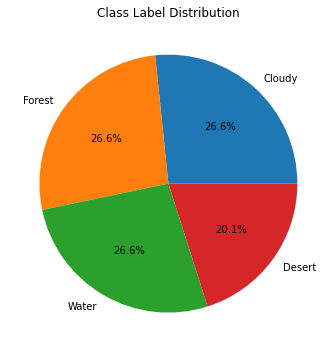

In [27]:
# Plot Class labels distribution
plt.figure(figsize=(5,5))
plt.pie(x=df_img_data["Label"].value_counts().values,labels=['Cloudy','Forest','Water','Desert'],autopct='%1.1f%%')
plt.title("Class Label Distribution")
plt.tight_layout()

## Spliting features & target values

In [28]:
x=df_img_data.drop(columns="Label",axis=1)
y=df_img_data["Label"]

In [29]:
x.shape,y.shape

((5631, 12288), (5631,))

## Spliting data into train and test

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state = 56,stratify=y)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3941, 12288), (1690, 12288), (3941,), (1690,))

## Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Principal Component Analysis (PCA)

In [33]:
# Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep.
pca = PCA(random_state=11).fit(x_train)

In [34]:
pca.explained_variance_

array([1.12628882e+04, 5.64461265e+02, 7.06005022e+01, ...,
       2.38091967e-33, 1.35832601e-33, 9.60265726e-34])

In [35]:
len(pca.explained_variance_)

3941

In [36]:
pca.explained_variance_ratio_

array([9.16343616e-01, 4.59243194e-02, 5.74402570e-03, ...,
       1.93710574e-37, 1.10512805e-37, 7.81267957e-38])

In [37]:
len(pca.explained_variance_ratio_)

3941

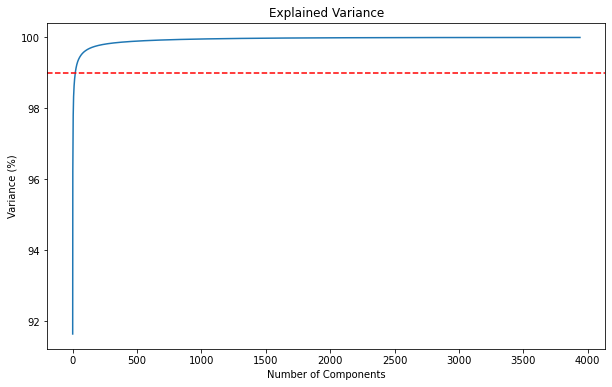

In [38]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 99% of the variance so plot a horizontal line at 99% variance
plt.axhline(y=99, color='r', linestyle='--')
plt.show()

Observation:
- From above plot, we can select 1000 components as it preserve almost 99% of original variance.

In [39]:
# Transforming the original train and test data to 1000 components
# Fit on the training data
pca = PCA(n_components=1000,random_state=11)

# Transform both training and test data
x_train_pca= pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [40]:
print(f"Original data dimensions:{x_train.shape}")
print(f"PCA transformed data dimensions:{x_train_pca.shape}")

Original data dimensions:(3941, 12288)
PCA transformed data dimensions:(3941, 1000)


In [41]:
x_train_pca

array([[ 7.93992028e+01, -3.15075100e+00,  1.39408697e+00, ...,
         2.83563323e-03,  7.63933165e-04,  3.84756178e-03],
       [-1.03923608e+02, -3.75816562e+00,  3.72193380e-01, ...,
        -5.63605313e-02, -3.41117336e-02, -5.30679451e-02],
       [ 6.54364025e+01,  1.15425890e+01,  1.37008304e+00, ...,
        -5.13976164e-02, -1.72912171e-01,  7.68121101e-02],
       ...,
       [-6.12918824e+01, -1.45374471e+00,  6.27247127e-01, ...,
         3.49907352e-02,  4.53735646e-02, -2.69189128e-02],
       [-1.19657086e+02, -4.52590810e+00, -1.58766962e-01, ...,
         1.90552417e-03,  2.97732196e-02, -3.90541493e-02],
       [-8.57776577e+01,  1.20796664e+01, -1.84611679e+00, ...,
        -2.12768445e-02, -3.84155948e-02, -1.74577920e-01]])

## Vizualize the data with 2 principal components 

Text(0, 0.5, 'Second Principal Component')

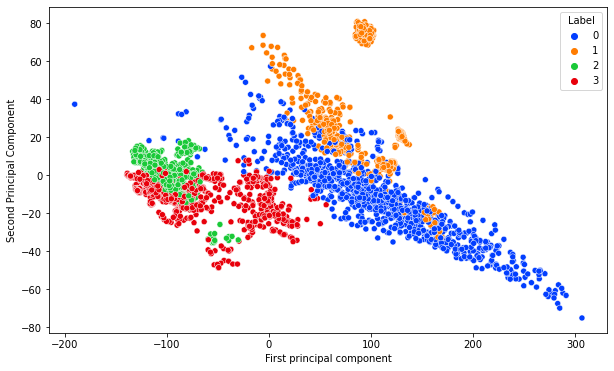

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_train_pca[:,0],y=x_train_pca[:,1],hue=y_train,palette='bright')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Model 1: Logistic Regression

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [44]:
def cross_Val_logreg(c_list):
    
    avg_f1score = []
    std = []
  
    for i in c_list:
    
    # 5 fold cross validation for every value of  c
      f_score = cross_val_score(estimator=OneVsRestClassifier(estimator=LogisticRegression(penalty='l2',C=i,random_state=11,n_jobs=-1),n_jobs=-1)
                                , X=x_train_pca, y=y_train, cv=5, scoring='f1_weighted')
    
    # Adding mean to avg list
      avg_f1score.append(f_score.mean())
    
    # Adding standard deviation to std list
      std.append(f_score.std())
    
    return avg_f1score, std

In [45]:
c_list = [0.001,0.003,0.005,0.01]
mean_f1score, std = cross_Val_logreg(c_list)

In [46]:
mean_f1score

[0.8162172868499397,
 0.8167620018875292,
 0.8163057950366234,
 0.8130744748765473]

### Ploting Mean Validation Score for each C value

In [47]:
pd.DataFrame({'C_Values': c_list, 'f1_Score': mean_f1score,"standard_Deviation":std}
            ).sort_values(by='f1_Score', ascending=False).head()

,C_Values,f1_Score,standard_Deviation
1,0.003,0.816762,0.013220
2,0.005,0.816306,0.012913
0,0.001,0.816217,0.012499
3,0.010,0.813074,0.011832


Text(0.5, 1.0, 'Cross Validation score')

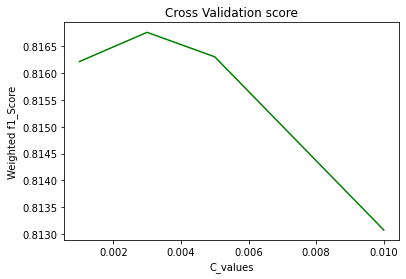

In [48]:
plt.plot(c_list,mean_f1score, color = 'green', label = 'mean' )
plt.xlabel('C_values')
plt.ylabel('Weighted f1_Score')
plt.title('Cross Validation score')

### Build model with C=0.005

In [49]:
model_logreg=OneVsRestClassifier(estimator=LogisticRegression(penalty='l2',C=0.005,random_state=11,n_jobs=-1),n_jobs=-1)

## Fit the training data
model_logreg.fit(x_train_pca,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.005, n_jobs=-1,
                                                 random_state=11),
                    n_jobs=-1)

In [50]:
## Predict values using train data
y_train_predict_logreg=model_logreg.predict(x_train_pca)

## Predict values using test data
y_test_predict_logreg=model_logreg.predict(x_test_pca)

## Logistic Model Evaluation

In [51]:
# Accuracy score on training data
training_data_accuracy_logreg=accuracy_score(y_train,y_train_predict_logreg)

# Accuracy on test data
test_data_accuracy_logreg=accuracy_score(y_test,y_test_predict_logreg)

# F1 score on train-test data
train_f1score_logreg = f1_score(y_train,y_train_predict_logreg,average='weighted')
test_f1score_logreg = f1_score(y_test,y_test_predict_logreg,average='weighted')

print("Multiclass Logistic Regression:")
print(f"Accuracy of training data ={round(training_data_accuracy_logreg*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_logreg*100,2)}%")
print(f"F1 score on train data ={train_f1score_logreg}")
print(f"F1 score on test data ={test_f1score_logreg}")

Multiclass Logistic Regression:
Accuracy of training data =83.71%
Accuracy of test data =82.13%
F1 score on train data =0.8364601573863121
F1 score on test data =0.8208221635502467


In [52]:
print(classification_report(y_test,y_test_predict_logreg))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       450
           1       0.88      0.96      0.92       340
           2       0.75      0.77      0.76       450
           3       0.75      0.73      0.74       450

    accuracy                           0.82      1690
   macro avg       0.83      0.83      0.83      1690
weighted avg       0.82      0.82      0.82      1690



Observation:
- Logistic Regression model gives accuracy of 82.13 % and f1_score of 0.82 on test data.
- Now we try SVM classifier.   

## Model 2: Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
def cross_Val_SVC(c_list):
    
    avg_f1score = []
    std = []
  
    for i in c_list:
    
    # 5 fold cross validation for every value of  c
      f_score = cross_val_score(estimator=OneVsRestClassifier(estimator=SVC(C=i,kernel='rbf',random_state=11),n_jobs=-1)
                                , X=x_train_pca, y=y_train, cv=5, scoring='f1_weighted')
    
    # Adding mean to avg list
      avg_f1score.append(f_score.mean())
    
    # Adding standard deviation to std list
      std.append(f_score.std())
    
    return avg_f1score, std

In [55]:
c_list = [5,10,15,20,25]
f1score_SVC, std = cross_Val_SVC(c_list)

### Ploting Mean Validation Score for each C value

In [56]:
pd.DataFrame({'C_Values': c_list, 'f1_Score': f1score_SVC,"standard_Deviation":std}
            ).sort_values(by='f1_Score', ascending=False).head()

,C_Values,f1_Score,standard_Deviation
4,25,0.924589,0.006522
3,20,0.924318,0.006507
2,15,0.923563,0.008296
1,10,0.921533,0.009177
0,5,0.919530,0.008617


Text(0.5, 1.0, 'Cross Validation score')

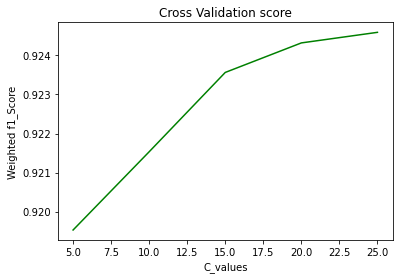

In [57]:
plt.plot(c_list,f1score_SVC, color = 'green', label = 'mean' )
plt.xlabel('C_values')
plt.ylabel('Weighted f1_Score')
plt.title('Cross Validation score')

### Build model with C=25

In [58]:
model_SVC=OneVsRestClassifier(estimator=SVC(C=25,kernel='rbf',random_state=11),n_jobs=-1)

## Fit the training data
model_SVC.fit(x_train_pca,y_train)

OneVsRestClassifier(estimator=SVC(C=25, random_state=11), n_jobs=-1)

In [59]:
## Predict values using train data
y_train_predict_SVC=model_SVC.predict(x_train_pca)

## Predict values using test data
y_test_predict_SVC=model_SVC.predict(x_test_pca)

## SVM Model Evaluation

In [60]:
# Accuracy score on training data
training_data_accuracy_SVC=accuracy_score(y_train,y_train_predict_SVC)

# Accuracy on test data
test_data_accuracy_SVC=accuracy_score(y_test,y_test_predict_SVC)

# F1 score on train-test data
train_f1score_SVC = f1_score(y_train,y_train_predict_SVC,average='weighted')
test_f1score_SVC = f1_score(y_test,y_test_predict_SVC,average='weighted')

print("Support Vector Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_SVC*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_SVC*100,2)}%")
print(f"F1 score on train data ={train_f1score_SVC}")
print(f"F1 score on test data ={test_f1score_SVC}")

Support Vector Classifier:
Accuracy of training data =94.44%
Accuracy of test data =92.01%
F1 score on train data =0.9443776416746978
F1 score on test data =0.9201023813278864


In [61]:
print(classification_report(y_test,y_test_predict_SVC))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       450
           1       0.95      0.97      0.96       340
           2       0.86      0.94      0.90       450
           3       0.92      0.85      0.88       450

    accuracy                           0.92      1690
   macro avg       0.92      0.92      0.92      1690
weighted avg       0.92      0.92      0.92      1690



Observation:
- SVM classifier gives accuracy of 92.01 % and f1_score of 0.92 on test data which is high compare to logistic regression model.
- Now we try KNN classifier.   

## Model 3: KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [63]:
def cross_val_KNN(n_neighbors):

    avg_f1score = []
    std = []
  
    for i in n_neighbors:
    
    # 5 fold cross validation for every value of n_neighbor
      f_score = cross_val_score(KNC(n_neighbors=i, n_jobs=-1) , X=x_train_pca, y=y_train, cv=5, scoring='f1_weighted')
    
    # Adding mean to avg list
      avg_f1score.append(f_score.mean())
    
    # Adding standard deviation to std list
      std.append(f_score.std())
    
    return avg_f1score, std

In [64]:
n_neighbors = [3,5,7,9,11,13,15]
f1score_KNN, std = cross_val_KNN(n_neighbors)

### Ploting Mean Validation Score for each K value

In [65]:
pd.DataFrame({'N_neighbors': n_neighbors, 'f_Score':f1score_KNN ,"standard_Deviation":std}
            ).sort_values(by='f_Score', ascending=False).head()

,N_neighbors,f_Score,standard_Deviation
3,9,0.897738,0.006709
4,11,0.897079,0.009948
5,13,0.896358,0.011102
2,7,0.896293,0.004716
6,15,0.896173,0.006836


Text(0.5, 1.0, 'Cross Validation score')

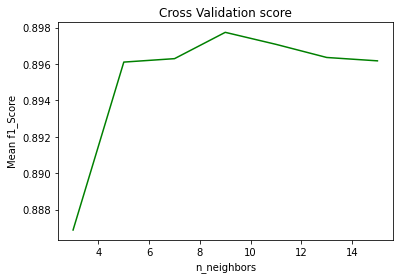

In [66]:
plt.plot(n_neighbors,f1score_KNN , color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean f1_Score')
plt.title('Cross Validation score')

### Build model with k=9

In [67]:
model_KNC=KNC(n_neighbors=9,n_jobs=-1)

## Fit the training data
model_KNC.fit(x_train_pca,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)

In [68]:
## Predict values using train data
y_train_predict_KNC=model_KNC.predict(x_train_pca)

## Predict values using test data
y_test_predict_KNC=model_KNC.predict(x_test_pca)

## KNN Model Evaluation

In [69]:
# Accuracy score on training data
training_data_accuracy_KNC=accuracy_score(y_train,y_train_predict_KNC)

# Accuracy on test data
test_data_accuracy_KNC=accuracy_score(y_test,y_test_predict_KNC)

# F1 score on train-test data
train_f1score_KNC = f1_score(y_train,y_train_predict_KNC,average='weighted')
test_f1score_KNC = f1_score(y_test,y_test_predict_KNC,average='weighted')

print("KNN Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_KNC*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_KNC*100,2)}%")
print(f"F1 score on train data ={train_f1score_KNC}")
print(f"F1 score on test data ={test_f1score_KNC}")

KNN Classifier:
Accuracy of training data =90.89%
Accuracy of test data =89.41%
F1 score on train data =0.9084590296881071
F1 score on test data =0.8934326921107052


In [70]:
print(classification_report(y_test,y_test_predict_KNC))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       450
           1       0.98      0.93      0.96       340
           2       0.94      0.74      0.82       450
           3       0.77      0.96      0.86       450

    accuracy                           0.89      1690
   macro avg       0.91      0.90      0.90      1690
weighted avg       0.90      0.89      0.89      1690



Observation:
- KNN classifier gives accuracy of 89.41 % and f1_score of 0.893 on test data which is high compare to logistic regression model but less compare to SVM model results.
- Now we try Random Forest classifier.  

## Model 4:  Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [72]:
def cross_val_RFC(depth):

    avg_f1score = []
    std = []
  
    for i in depth:
    
    # 5 fold cross validation for every value of depth
      f_score = cross_val_score(RFC(max_depth=i, max_features='sqrt', min_samples_leaf=5,n_estimators=1600,n_jobs=-1,random_state=11),
                                X=x_train_pca, y=y_train, cv=5, scoring='f1_weighted')
    
    # Adding mean to avg list
      avg_f1score.append(f_score.mean())
    
    # Adding standard deviation to std list
      std.append(f_score.std())
    
    return avg_f1score, std

In [73]:
depth_list = [5,10,15,20]
f1score_RFC, std = cross_val_RFC(depth_list)

### Ploting Cross Validation Score for each tree_depth value

In [74]:
pd.DataFrame({'max_depth':depth_list, 'f1_Score':f1score_RFC ,"standard_Deviation":std}
            ).sort_values(by='f1_Score', ascending=False).head()

,max_depth,f1_Score,standard_Deviation
3,20,0.922608,0.005950
2,15,0.922388,0.006983
1,10,0.918549,0.006444
0,5,0.817159,0.014749


Text(0.5, 1.0, 'Cross Validation score')

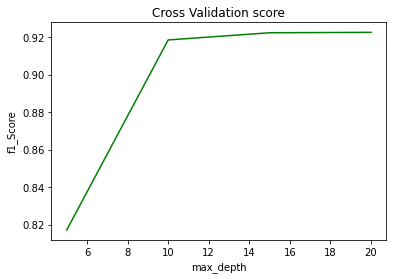

In [75]:
plt.plot(depth_list,f1score_RFC, color = 'green', label = 'mean' )
plt.xlabel('max_depth')
plt.ylabel('f1_Score')
plt.title('Cross Validation score')

### Build model with max_depth=20

In [76]:
model_RFC = RFC(max_depth=20, max_features='sqrt', min_samples_leaf=5,n_estimators=1600,n_jobs=-1,random_state=11)

## Fit the training data
model_RFC.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=1600,
                       n_jobs=-1, random_state=11)

In [77]:
## Predict values using train data
y_train_predict_RFC=model_RFC.predict(x_train_pca)

## Predict values using test data
y_test_predict_RFC=model_RFC.predict(x_test_pca)

## RFC Model Evaluation

In [78]:
# Accuracy score on training data
training_data_accuracy_RFC=accuracy_score(y_train,y_train_predict_RFC)

# Accuracy on test data
test_data_accuracy_RFC=accuracy_score(y_test,y_test_predict_RFC)

# F1 score on train-test data
train_f1score_RFC = f1_score(y_train,y_train_predict_RFC,average='weighted')
test_f1score_RFC = f1_score(y_test,y_test_predict_RFC,average='weighted')

print("Random Forest Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_RFC*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_RFC*100,2)}%")
print(f"F1 score on train data ={train_f1score_RFC}")
print(f"F1 score on test data ={test_f1score_RFC}")

Random Forest Classifier:
Accuracy of training data =100.0%
Accuracy of test data =90.59%
F1 score on train data =1.0
F1 score on test data =0.9055330238330863


In [79]:
print(classification_report(y_test,y_test_predict_RFC))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       450
           1       0.89      0.94      0.92       340
           2       0.87      0.95      0.91       450
           3       0.94      0.83      0.88       450

    accuracy                           0.91      1690
   macro avg       0.91      0.91      0.91      1690
weighted avg       0.91      0.91      0.91      1690



Observation:
- Random Forest classifier gives accuracy of 90.59 % and f1_score of 0.906 on test data which is high compare to both logistic regression and KNN model but still less compared to SVM model results.
- Now we try XGBOOST classifier.  

## Model 5: XGBOOST Classifier

In [80]:
import xgboost as xgb

In [81]:
model_XGB= xgb.XGBClassifier()

## Fit the training data
model_XGB.fit(x_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [82]:
## Predict values using train data
y_train_predict_XGB=model_XGB.predict(x_train_pca)

## Predict values using test data
y_test_predict_XGB=model_XGB.predict(x_test_pca)

## Xgboost Model Evaluation

In [83]:
# Accuracy score on training data
training_data_accuracy_XGB=accuracy_score(y_train,y_train_predict_XGB)

# Accuracy on test data
test_data_accuracy_XGB=accuracy_score(y_test,y_test_predict_XGB)

# F1 score on train-test data
train_f1score_XGB= f1_score(y_train,y_train_predict_XGB,average='weighted')
test_f1score_XGB = f1_score(y_test,y_test_predict_XGB,average='weighted')

print("XGBOOST Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_XGB*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_XGB*100,2)}%")
print(f"F1 score on train data ={train_f1score_XGB}")
print(f"F1 score on test data ={test_f1score_XGB}")

XGBOOST Classifier:
Accuracy of training data =100.0%
Accuracy of test data =95.5%
F1 score on train data =1.0
F1 score on test data =0.9550305499067244


In [84]:
print(classification_report(y_test,y_test_predict_XGB))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       450
           1       0.98      0.96      0.97       340
           2       0.96      0.92      0.94       450
           3       0.92      0.96      0.94       450

    accuracy                           0.96      1690
   macro avg       0.96      0.96      0.96      1690
weighted avg       0.96      0.96      0.96      1690



Observation:
- XGBOOST Classifier performed best in all models as it gives accuracy of 95.5 % and f1_score of 0.955 on test data.

## Model Performance Comparision

In [85]:
model=['Logistic Regression','KNN Classifier','Support Vector Classifier','Random Forest Classifier','XGBOOST Classifier']
accuracy=[test_data_accuracy_logreg,test_data_accuracy_KNC,test_data_accuracy_SVC,test_data_accuracy_RFC,test_data_accuracy_XGB]
f_score=[test_f1score_logreg,test_f1score_KNC,test_f1score_SVC,test_f1score_RFC,test_f1score_XGB]

model_df=pd.DataFrame({"Model":model,"Accuracy":accuracy,"F1_score":f_score})
model_df.sort_values(by=["F1_score"],ascending=False)

,Model,Accuracy,F1_score
4,XGBOOST Classifier,0.955030,0.955031
2,Support Vector Classifier,0.920118,0.920102
3,Random Forest Classifier,0.905917,0.905533
1,KNN Classifier,0.894083,0.893433
0,Logistic Regression,0.821302,0.820822


Observation:
- From above we conclude that, among all models XGBOOST Classifier gave best result with **accuracy** of **95.5 %** and **f1_score** of **0.955** on test data.